In [245]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [91]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.3.2
설치 위치:  C:\Users\museh\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\museh\.matplotlib
캐시 위치:  C:\Users\museh\.matplotlib


In [108]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [92]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\museh\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [2]:
crm = pd.read_csv("C:/L1K4\모델링/data/crm3_final.csv", index_col=0)

In [3]:
crm

,나이,성별,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
0,3.0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,3.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2,4.0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
3,1.0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1
4,1.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3968,8.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
3969,3.0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1
3970,2.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1


### 나이별 특성정리

In [232]:
crm_age = crm.groupby("나이",as_index=False).sum()

In [233]:
crm_age = crm_age.drop("성별", axis=1)

In [234]:
crm_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      9 non-null      float64
 1   건성      9 non-null      int64  
 2   지성      9 non-null      int64  
 3   모름      9 non-null      int64  
 4   건조함     9 non-null      int64  
 5   과잉피지    9 non-null      int64  
 6   여드름     9 non-null      int64  
 7   좁쌀      9 non-null      int64  
 8   홍조&예민   9 non-null      int64  
 9   복합성     9 non-null      int64  
 10  기미&잡티   9 non-null      int64  
 11  미백앰플    9 non-null      int64  
 12  수분라이트   9 non-null      int64  
 13  수분앰플    9 non-null      int64  
 14  쑥앰플     9 non-null      int64  
 15  진정앰플    9 non-null      int64  
dtypes: float64(1), int64(15)
memory usage: 1.2 KB


In [235]:
crm_age

,나이,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
0,0.0,3,3,2,6,3,7,4,2,6,2,1,0,1,0,12
1,1.0,29,19,13,57,43,79,80,51,68,26,4,0,18,1,106
2,2.0,163,88,42,344,249,339,397,299,386,197,11,1,115,15,537
3,3.0,258,99,69,592,382,362,487,445,623,390,35,4,158,36,816
4,4.0,276,74,41,566,298,206,377,372,601,471,53,3,198,26,712
5,5.0,218,36,21,409,143,107,158,220,399,381,62,8,141,18,445
6,6.0,72,14,6,121,31,28,38,70,114,118,29,0,48,5,124
7,7.0,25,8,5,41,10,15,20,27,41,47,9,0,7,4,59
8,8.0,71,8,6,92,28,23,36,36,65,71,9,0,29,4,108


In [236]:
crm_age["앰플구매"] = crm_age["미백앰플"] + crm_age["수분앰플"] + crm_age["쑥앰플"] + crm_age["진정앰플"]

In [237]:
crm_age

,나이,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플,앰플구매
0,0.0,3,3,2,6,3,7,4,2,6,2,1,0,1,0,12,14
1,1.0,29,19,13,57,43,79,80,51,68,26,4,0,18,1,106,129
2,2.0,163,88,42,344,249,339,397,299,386,197,11,1,115,15,537,678
3,3.0,258,99,69,592,382,362,487,445,623,390,35,4,158,36,816,1045
4,4.0,276,74,41,566,298,206,377,372,601,471,53,3,198,26,712,989
5,5.0,218,36,21,409,143,107,158,220,399,381,62,8,141,18,445,666
6,6.0,72,14,6,121,31,28,38,70,114,118,29,0,48,5,124,206
7,7.0,25,8,5,41,10,15,20,27,41,47,9,0,7,4,59,79
8,8.0,71,8,6,92,28,23,36,36,65,71,9,0,29,4,108,150


In [238]:
crm_age = crm_age.astype("int64")

In [243]:
# 10대이하는 삭제
crm_age = crm_age.drop(index=0)

Text(0.5, 1.0, '나이별 앰플 구입수')

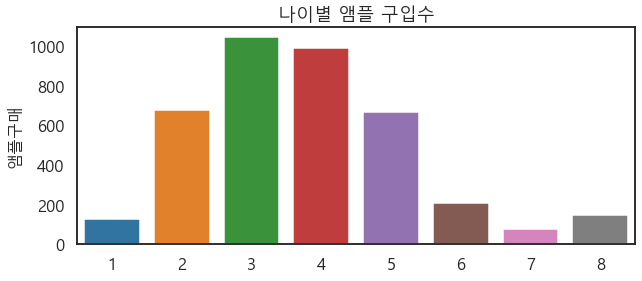

In [244]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=crm_age.index, y="앰플구매", data=crm_age, palette="tab10")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("나이별 앰플 구입수")

### 피부고민 별 앰플 구매 수

In [133]:
crm_problem1 = crm.groupby("건조함").sum()

In [134]:
crm_problem1

,나이,성별,건성,지성,모름,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
건조함,,,,,,,,,,,,,,,,
0,6382.0,159,165,283,97,635,628,752,650,1199,706,86,5,270,56,1327
1,8579.0,129,950,66,108,552,538,845,872,1104,997,127,11,445,53,1592


In [145]:
crm_problem1 = crm_problem1.rename(index={0:"없음", 1:"있음"})

Text(0.5, 1.0, '건조함 여부에따른 미백앰플 구입수')

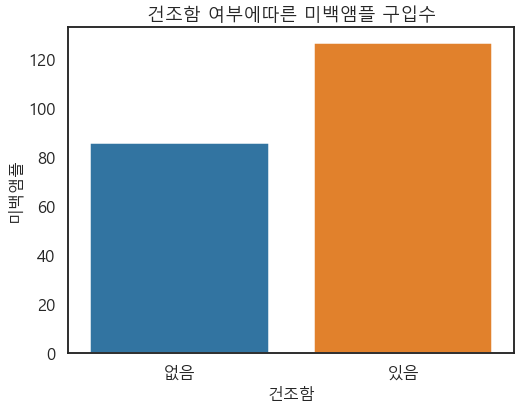

In [151]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=crm_problem1.index, y="미백앰플", data=crm_problem1, palette="tab10")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("건조함 여부에따른 미백앰플 구입수")

In [159]:
def problem_graph(xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=xlabel.index, y=ylabel, data=xlabel, palette="tab10")
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.title(title)

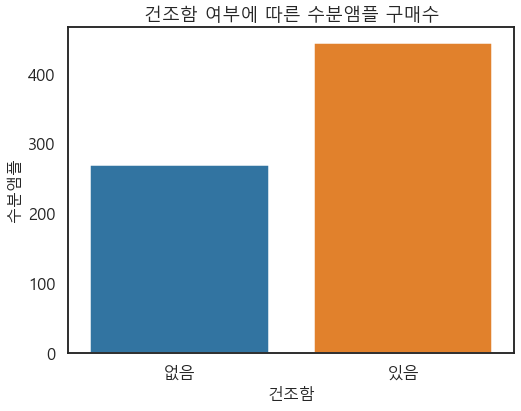

In [160]:
problem_graph(crm_problem1, "수분앰플", "건조함 여부에 따른 수분앰플 구매수")

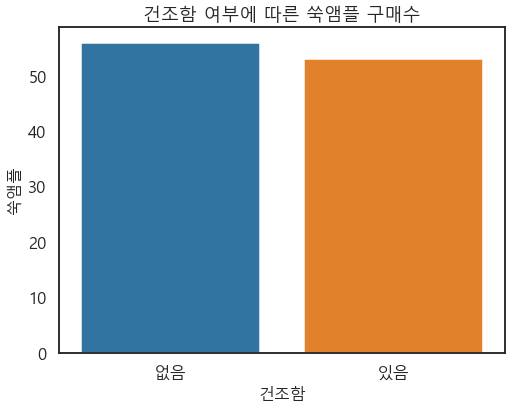

In [161]:
problem_graph(crm_problem1, "쑥앰플", "건조함 여부에 따른 쑥앰플 구매수")

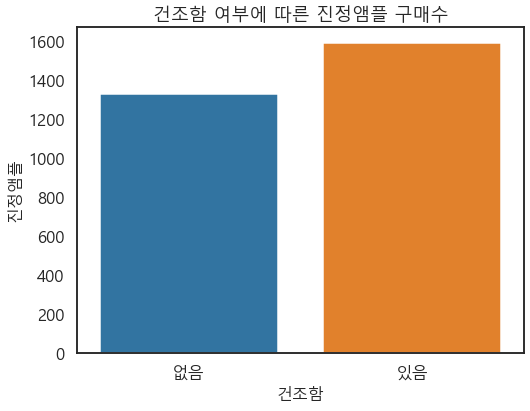

In [162]:
problem_graph(crm_problem1, "진정앰플", "건조함 여부에 따른 진정앰플 구매수")

In [157]:
crm_problem2 = crm.groupby("과잉피지").sum()

In [158]:
crm_problem2 = crm_problem2.rename(index={0:"없음", 1:"있음"})

In [165]:
crm_problem2

,나이,성별,건성,지성,모름,건조함,여드름,좁쌀,홍조&예민,복합성,기미&잡티,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
과잉피지,,,,,,,,,,,,,,,,
없음,10887.0,187,1018,114,152,1676,595,960,1028,1501,1232,185,13,553,70,1964
있음,4074.0,101,97,235,53,552,571,637,494,802,471,28,3,162,39,955


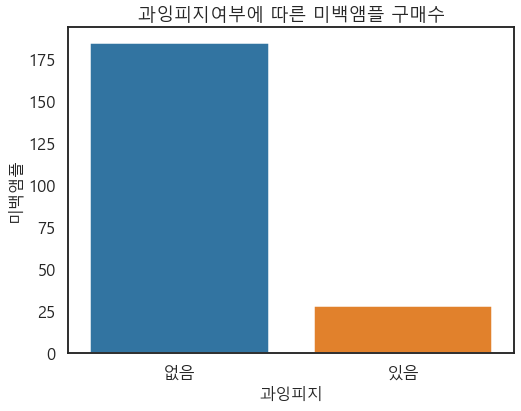

In [187]:
problem_graph(crm_problem2, "미백앰플", "과잉피지여부에 따른 미백앰플 구매수")

problem_graph(crm_problem2, "수분앰플", "과잉피지여부에 따른 수분앰플 구매수")

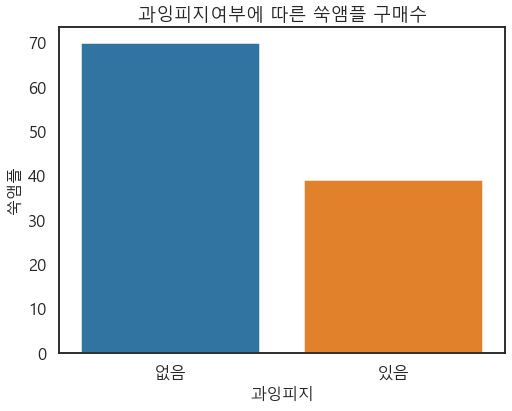

In [189]:
problem_graph(crm_problem2, "쑥앰플", "과잉피지여부에 따른 쑥앰플 구매수")

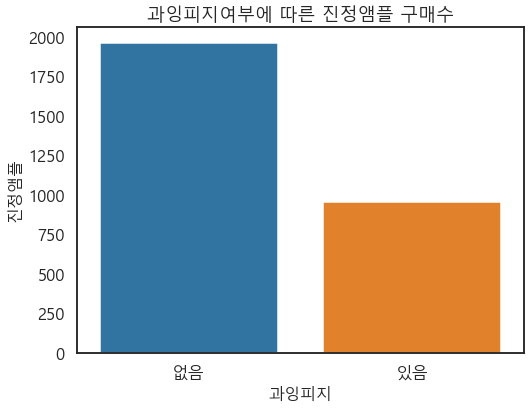

In [190]:
problem_graph(crm_problem2, "진정앰플", "과잉피지여부에 따른 진정앰플 구매수")

#### 여드름

In [192]:
crm_problem4 = crm.groupby("여드름").sum()

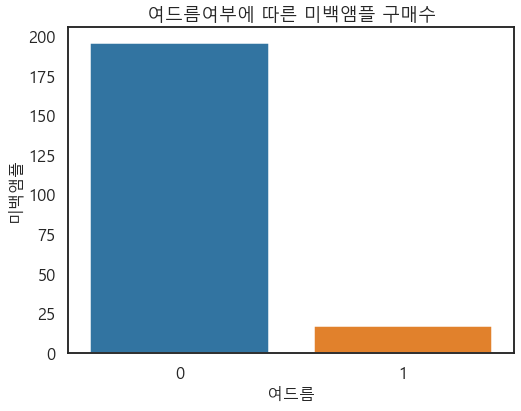

In [194]:
problem_graph(crm_problem4, "미백앰플", "여드름여부에 따른 미백앰플 구매수")

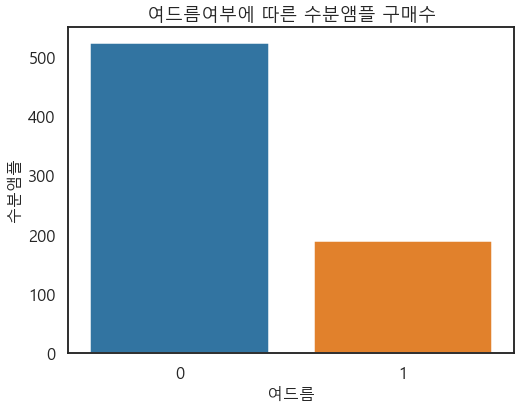

In [195]:
problem_graph(crm_problem4, "수분앰플", "여드름여부에 따른 수분앰플 구매수")

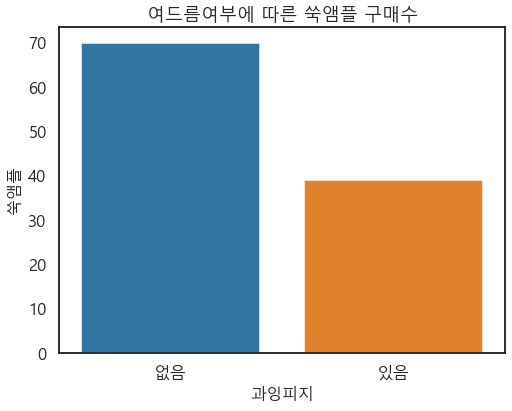

In [196]:
problem_graph(crm_problem2, "쑥앰플", "여드름여부에 따른 쑥앰플 구매수")

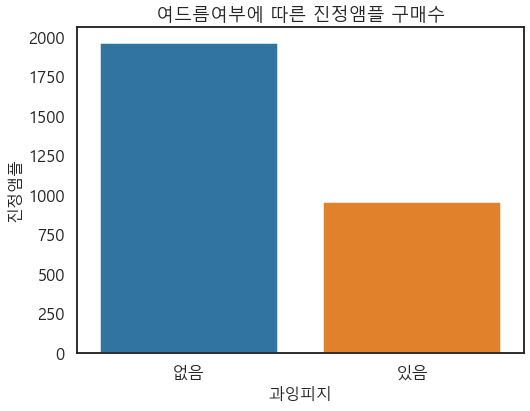

In [197]:
problem_graph(crm_problem2, "진정앰플", "여드름여부에 따른 진정앰플 구매수")

#### 좁쌀여드름


In [193]:
crm_problem5 = crm.groupby("좁쌀").sum()

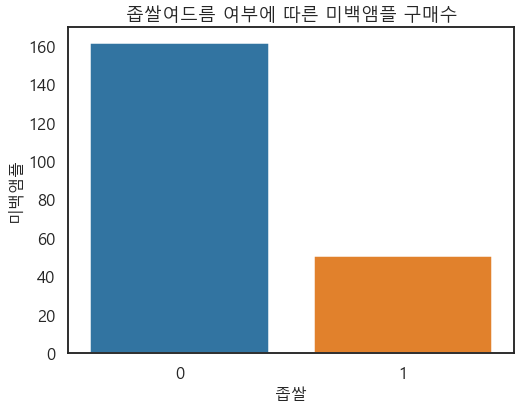

In [202]:
problem_graph(crm_problem5, "미백앰플", "좁쌀여드름 여부에 따른 미백앰플 구매수")

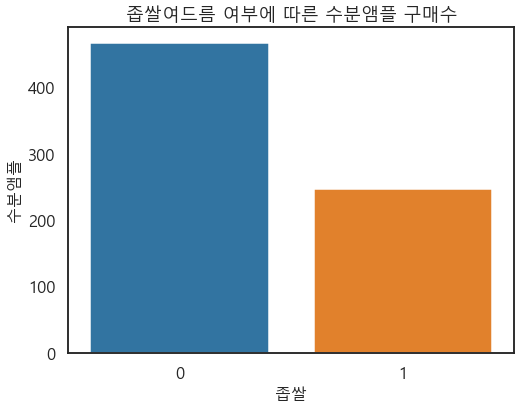

In [203]:
problem_graph(crm_problem5, "수분앰플", "좁쌀여드름 여부에 따른 수분앰플 구매수")

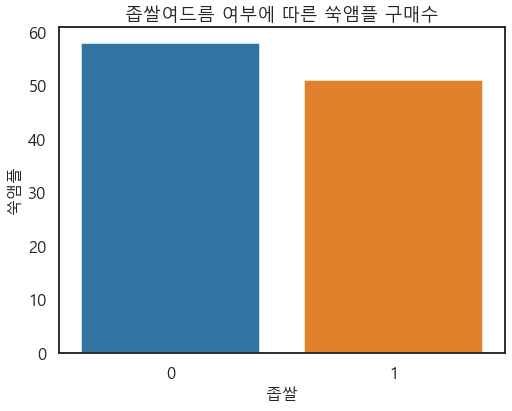

In [204]:
problem_graph(crm_problem5, "쑥앰플", "좁쌀여드름 여부에 따른 쑥앰플 구매수")

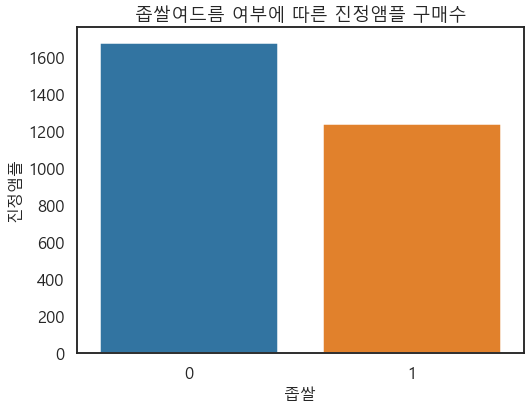

In [205]:
problem_graph(crm_problem5, "진정앰플", "좁쌀여드름 여부에 따른 진정앰플 구매수")

#### 홍조, 예민

In [210]:
crm_problem6 = crm.groupby("홍조&예민").sum()

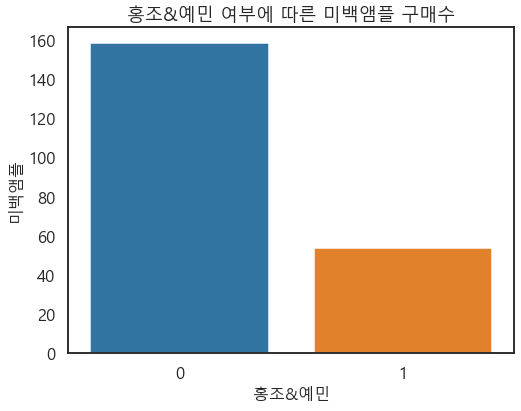

In [211]:
problem_graph(crm_problem6, "미백앰플", "홍조&예민 여부에 따른 미백앰플 구매수")

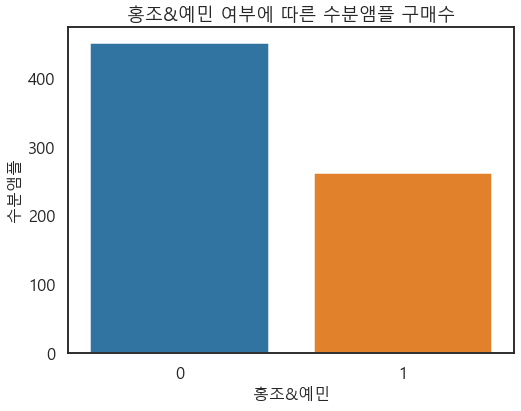

In [212]:
problem_graph(crm_problem6, "수분앰플", "홍조&예민 여부에 따른 수분앰플 구매수")

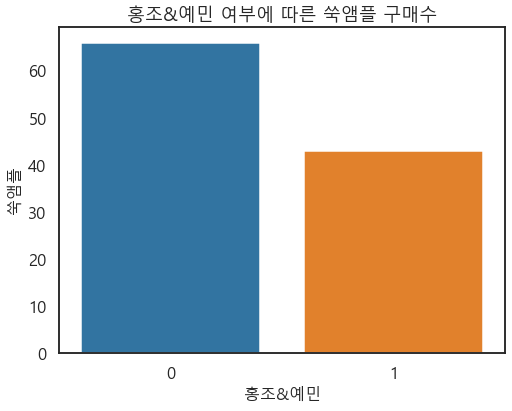

In [213]:
problem_graph(crm_problem6, "쑥앰플", "홍조&예민 여부에 따른 쑥앰플 구매수")

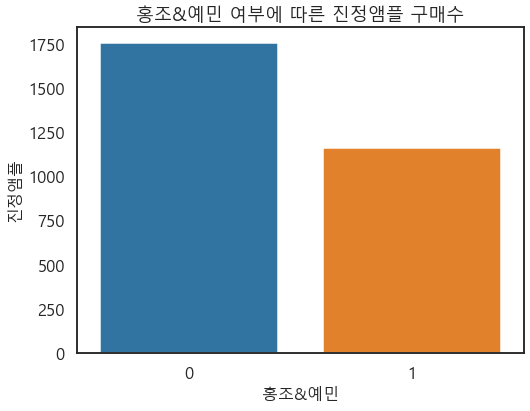

In [214]:
problem_graph(crm_problem6, "진정앰플", "홍조&예민 여부에 따른 진정앰플 구매수")

#### 기미, 잡티

In [215]:
crm_problem7 = crm.groupby("기미&잡티").sum()

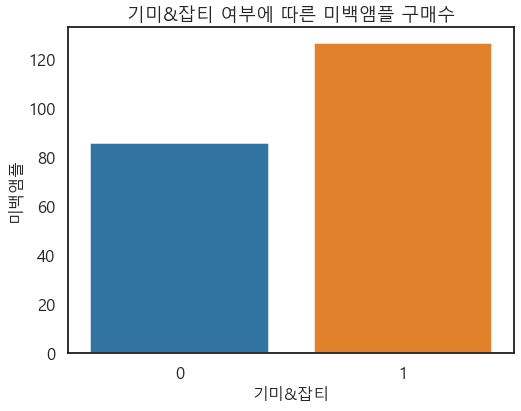

In [216]:
problem_graph(crm_problem7, "미백앰플", "기미&잡티 여부에 따른 미백앰플 구매수")

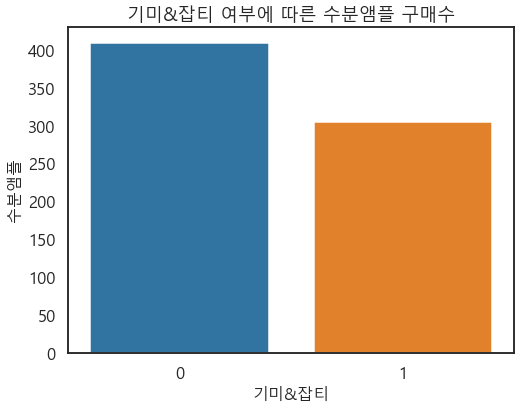

In [217]:
problem_graph(crm_problem7, "수분앰플", "기미&잡티 여부에 따른 수분앰플 구매수")

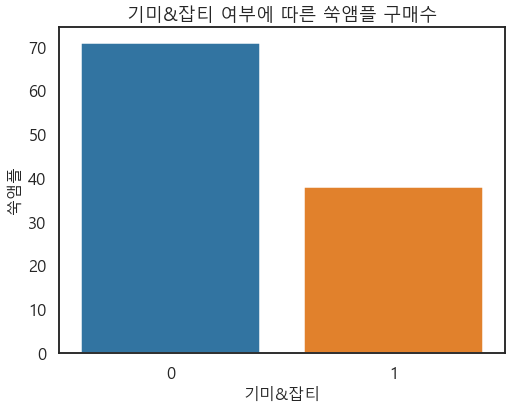

In [218]:
problem_graph(crm_problem7, "쑥앰플", "기미&잡티 여부에 따른 쑥앰플 구매수")

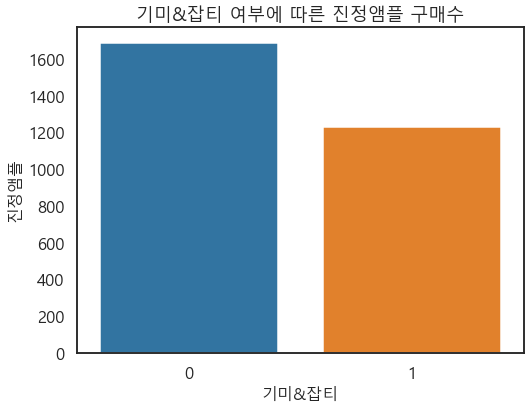

In [219]:
problem_graph(crm_problem7, "진정앰플", "기미&잡티 여부에 따른 진정앰플 구매수")